In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')

In [3]:
train_data.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50


In [4]:
test_data.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0


In [5]:
train_data.shape

(318438, 18)

In [6]:
test_data.shape

(137057, 17)

In [7]:
train_data.duplicated().sum()

0

In [8]:
test_data.duplicated().sum()

0

In [9]:
train_data['data']='train'
test_data['data']='test'

In [10]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [11]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,data
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0,test
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0,test
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0,test
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0,test
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0,test


In [12]:
total=pd.concat([train_data,test_data],axis=0)
total.shape

(455495, 19)

In [13]:
total.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [14]:
total.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test
137056,455495,6,a,6,X,3,gynecology,Q,F,4.0,126729,3.0,Trauma,Extreme,5,51-60,4702.0,NaN,test


In [15]:
total=total.drop(columns=['case_id','Hospital_code'],axis=1)
total.head()

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
0,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train


In [16]:
total.isnull().sum()

Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
data                                      0
dtype: int64

In [17]:
total.isnull().sum()/len(total)*100

Hospital_type_code                    0.000000
City_Code_Hospital                    0.000000
Hospital_region_code                  0.000000
Available Extra Rooms in Hospital     0.000000
Department                            0.000000
Ward_Type                             0.000000
Ward_Facility_Code                    0.000000
Bed Grade                             0.032492
patientid                             0.000000
City_Code_Patient                     1.468512
Type of Admission                     0.000000
Severity of Illness                   0.000000
Visitors with Patient                 0.000000
Age                                   0.000000
Admission_Deposit                     0.000000
Stay                                 30.089683
data                                  0.000000
dtype: float64

In [18]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_type_code                 455495 non-null  object 
 1   City_Code_Hospital                 455495 non-null  int64  
 2   Hospital_region_code               455495 non-null  object 
 3   Available Extra Rooms in Hospital  455495 non-null  int64  
 4   Department                         455495 non-null  object 
 5   Ward_Type                          455495 non-null  object 
 6   Ward_Facility_Code                 455495 non-null  object 
 7   Bed Grade                          455347 non-null  float64
 8   patientid                          455495 non-null  int64  
 9   City_Code_Patient                  448806 non-null  float64
 10  Type of Admission                  455495 non-null  object 
 11  Severity of Illness                4554

In [19]:
total=total.drop(['patientid'],axis=1)

In [20]:
total['Bed Grade'].value_counts()

2.0    176451
3.0    158942
4.0     82387
1.0     37567
Name: Bed Grade, dtype: int64

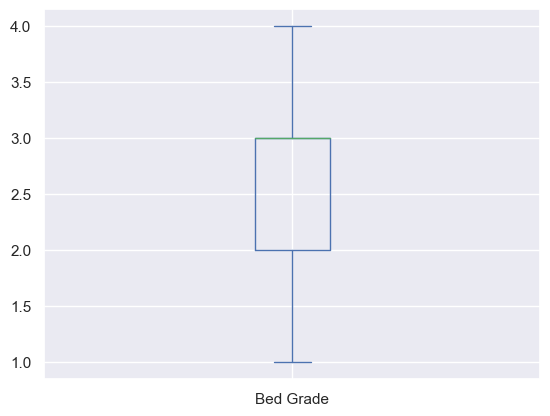

In [21]:
total['Bed Grade'].plot(kind='box')
plt.show()

In [22]:
total.describe(include='all')

,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
count,455495,455495.000000,455495,455495.000000,455495,455495,455495,455347.000000,448806.000000,455495,455495,455495.000000,455495,455495.000000,318438,455495
unique,7,NaN,3,NaN,5,6,6,NaN,NaN,3,3,NaN,10,NaN,11,2
top,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30,train
freq,204730,NaN,190849,NaN,356688,182939,161470,NaN,NaN,217672,251565,NaN,91495,NaN,87491,318438
mean,NaN,4.767798,NaN,3.196140,NaN,NaN,NaN,2.628420,7.249495,NaN,NaN,3.284229,NaN,4877.434022,NaN,NaN
std,NaN,3.102450,NaN,1.166994,NaN,NaN,NaN,0.871997,4.758941,NaN,NaN,1.768044,NaN,1084.982089,NaN,NaN
min,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN,NaN
25%,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,2.000000,NaN,4184.000000,NaN,NaN
50%,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,8.000000,NaN,NaN,3.000000,NaN,4738.000000,NaN,NaN
75%,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,8.000000,NaN,NaN,4.000000,NaN,5405.000000,NaN,NaN


In [23]:
total['Bed Grade']=total['Bed Grade'].fillna(total['Bed Grade'].median())

In [24]:
total=total.drop(columns=['City_Code_Hospital','City_Code_Patient'],axis=1)

In [25]:
total.isnull().sum()

Hospital_type_code                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                                 0
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
data                                      0
dtype: int64

In [26]:
total.describe(include='all')

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
count,455495,455495,455495.000000,455495,455495,455495,455495.000000,455495,455495,455495.000000,455495,455495.000000,318438,455495
unique,7,3,NaN,5,6,6,NaN,3,3,NaN,10,NaN,11,2
top,a,X,NaN,gynecology,R,F,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30,train
freq,204730,190849,NaN,356688,182939,161470,NaN,217672,251565,NaN,91495,NaN,87491,318438
mean,NaN,NaN,3.196140,NaN,NaN,NaN,2.628540,NaN,NaN,3.284229,NaN,4877.434022,NaN,NaN
std,NaN,NaN,1.166994,NaN,NaN,NaN,0.871881,NaN,NaN,1.768044,NaN,1084.982089,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,4184.000000,NaN,NaN
50%,NaN,NaN,3.000000,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,4738.000000,NaN,NaN
75%,NaN,NaN,4.000000,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,5405.000000,NaN,NaN


<Figure size 1400x1200 with 0 Axes>

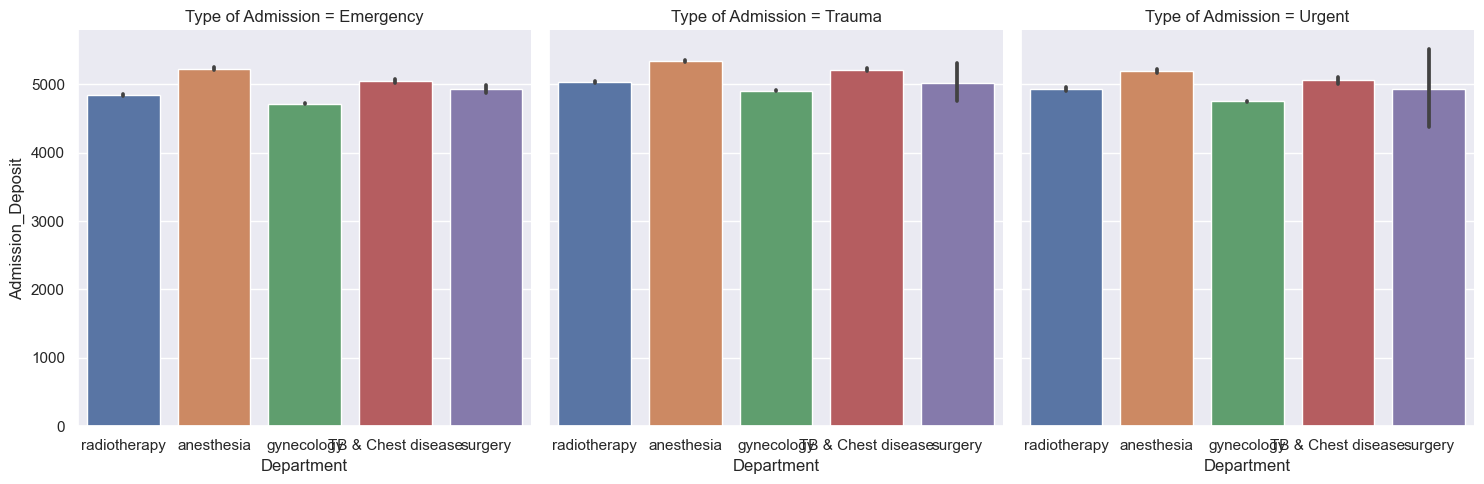

In [27]:
plt.figure(figsize=(14,12))
sns.catplot(total,x='Department',y='Admission_Deposit',kind='bar',col='Type of Admission')
plt.show()

<Figure size 1400x1200 with 0 Axes>

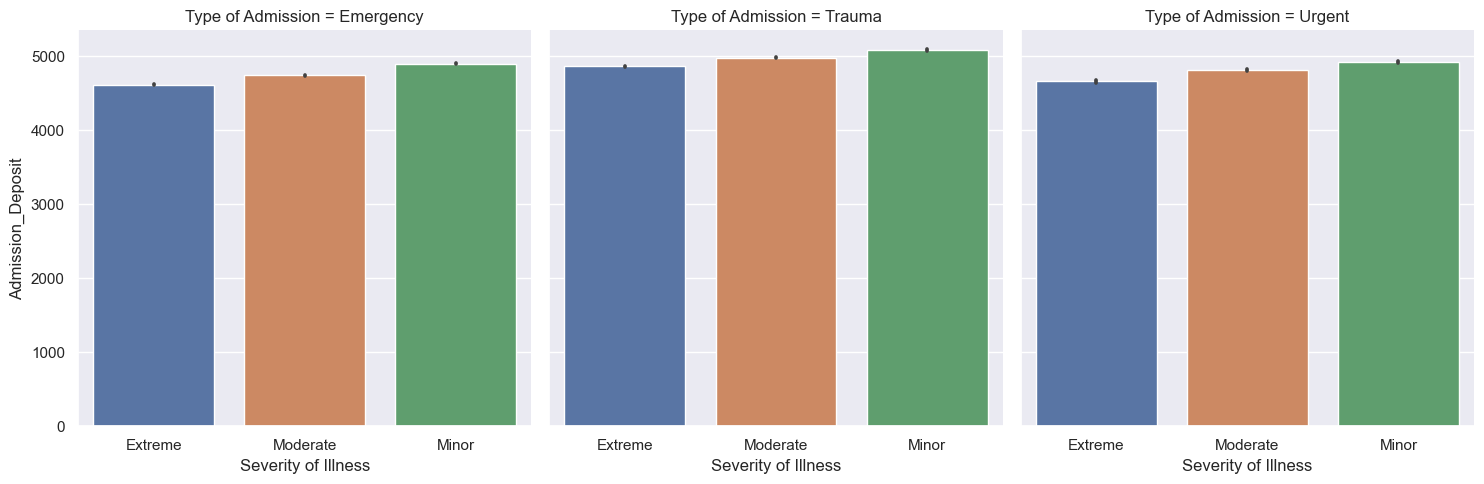

In [28]:
plt.figure(figsize=(14,12))
sns.catplot(total,x='Severity of Illness',y='Admission_Deposit',kind='bar',col='Type of Admission')
plt.show()

In [29]:
X=total.groupby('Department')['Admission_Deposit'].max().sort_values(ascending=False).head()
X

Department
radiotherapy          11920.0
gynecology            11293.0
TB & Chest disease    11008.0
anesthesia            10999.0
surgery               10670.0
Name: Admission_Deposit, dtype: float64

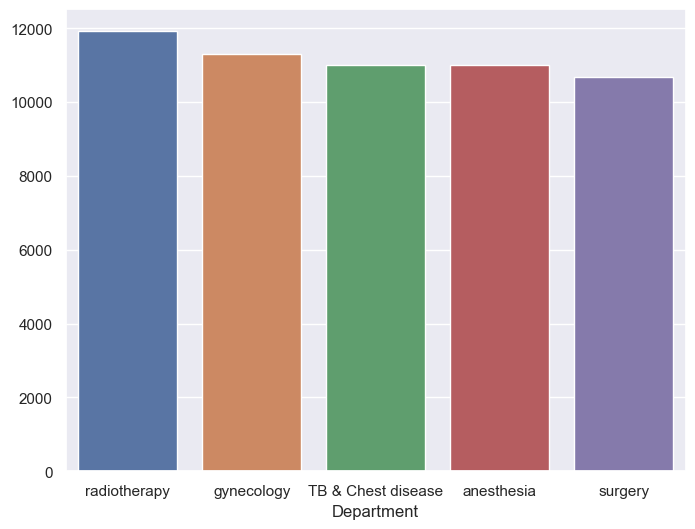

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(total,x=X.index,y=X.values)
plt.show()

In [31]:
label_encoder=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Stay']
label_encoder

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Stay']

In [32]:
le=LabelEncoder()
for i in label_encoder:
    total[i]=le.fit_transform(total[i])

In [33]:
total.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,data
0,2,2,3,3,2,5,2.0,Emergency,Extreme,2,51-60,4911.0,0,train
1,2,2,2,3,3,5,2.0,Trauma,Extreme,2,51-60,5954.0,4,train
2,4,0,2,1,3,4,2.0,Trauma,Extreme,2,51-60,4745.0,3,train
3,1,1,2,3,2,3,2.0,Trauma,Extreme,2,51-60,7272.0,4,train
4,1,1,2,3,3,3,2.0,Trauma,Extreme,2,51-60,5558.0,4,train


In [34]:
total=pd.get_dummies(data=total,columns=['Type of Admission','Severity of Illness','Age'],drop_first=True)

In [35]:
total.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2,2,3,3,2,5,2.0,2,4911.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,2,3,3,5,2.0,2,5954.0,4,...,0,0,0,0,0,1,0,0,0,0
2,4,0,2,1,3,4,2.0,2,4745.0,3,...,0,0,0,0,0,1,0,0,0,0
3,1,1,2,3,2,3,2.0,2,7272.0,4,...,0,0,0,0,0,1,0,0,0,0
4,1,1,2,3,3,3,2.0,2,5558.0,4,...,0,0,0,0,0,1,0,0,0,0


In [36]:
train=total[total['data']=='train']
test=total[total['data']=='test']

In [37]:
train.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2,2,3,3,2,5,2.0,2,4911.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,2,3,3,5,2.0,2,5954.0,4,...,0,0,0,0,0,1,0,0,0,0
2,4,0,2,1,3,4,2.0,2,4745.0,3,...,0,0,0,0,0,1,0,0,0,0
3,1,1,2,3,2,3,2.0,2,7272.0,4,...,0,0,0,0,0,1,0,0,0,0
4,1,1,2,3,3,3,2.0,2,5558.0,4,...,0,0,0,0,0,1,0,0,0,0


In [38]:
train=train.drop(['data'],axis=1)
test=test.drop(['Stay','data'],axis=1)

In [39]:
x=train.drop(['Stay'],axis=1)
y=train['Stay']

In [40]:
x.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Visitors with Patient,Admission_Deposit,Type of Admission_Trauma,...,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,2,2,3,3,2,5,2.0,2,4911.0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2,2,3,3,5,2.0,2,5954.0,1,...,0,0,0,0,0,1,0,0,0,0
2,4,0,2,1,3,4,2.0,2,4745.0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,2,3,2,3,2.0,2,7272.0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,1,2,3,3,3,2.0,2,5558.0,1,...,0,0,0,0,0,1,0,0,0,0


In [41]:
over=RandomOverSampler()
x_sam,y_sam=over.fit_resample(x,y)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_sam,y_sam,test_size=0.20,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(769920, 22) (192481, 22) (769920,) (192481,)


In [43]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
test1=scaler.transform(test)

In [44]:
rf=RandomForestClassifier(n_estimators=300,criterion='gini',bootstrap=True,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300, oob_score=True)

In [45]:
def models(model):
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    print(classification_report(y_train,pred_train))
    print(classification_report(y_test,pred_test))
    print()
    print(accuracy_score(y_train,pred_train))
    print(accuracy_score(y_test,pred_test))

In [46]:
models(rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70038
           1       1.00      1.00      1.00     69968
           2       1.00      1.00      1.00     69844
           3       1.00      1.00      1.00     69940
           4       1.00      1.00      1.00     69977
           5       1.00      1.00      1.00     70165
           6       1.00      1.00      1.00     69916
           7       1.00      1.00      1.00     70114
           8       1.00      1.00      1.00     69988
           9       1.00      1.00      1.00     70102
          10       1.00      1.00      1.00     69868

    accuracy                           1.00    769920
   macro avg       1.00      1.00      1.00    769920
weighted avg       1.00      1.00      1.00    769920

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     17453
           1       0.53      0.46      0.49     17523
           2       0.49 

In [47]:
final=rf.predict(test1)
final

array([0, 5, 2, ..., 1, 2, 7])

In [48]:
test['final report']=final
test.head()

,Hospital_type_code,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,Visitors with Patient,Admission_Deposit,Type of Admission_Trauma,...,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,final report
0,2,2,3,2,3,0,2.0,2,3095.0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,2,2,3,5,2.0,4,4018.0,1,...,0,0,0,0,0,0,1,0,0,5
2,1,1,3,2,1,3,4.0,3,4492.0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,3,2,1,5,2.0,3,4173.0,1,...,0,0,0,0,0,0,1,0,0,4
4,1,0,2,2,2,5,2.0,4,4161.0,1,...,0,0,0,0,0,0,1,0,0,7
